In [80]:
#Dependencies
import requests
import json
import gmaps
import time
import gmaps.datasets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from us import states

from yelpapi import get_my_key  #yelp key
from gkey import gkey           #gmap key

In [81]:
#Define all the pathways
population_csv_path = "../Project1/Population_by_Zip.csv"

business_id = "e1zDuraqPYNqfEmgXJJAyQ"
ENDPORINT = "https://api.yelp.com/v3/businesses/search"
HEADERS = {'Authorization': 'bearer %s' % get_my_key}

In [82]:
# This function launches the request for all coffee shop location endpoints in Chicago IL.
def search_coffeshops(set_num): 
    
    url_params = {
    "categories": 'coffee, All',
    "location":"Chicago",
    "state": "Illinois",
    'offset': offset_num, # We are going to iterate the offset
     "limit":50 # Maximum return of results per request (ref: API documentation).
     }

    response = requests.get(ENDPORINT, headers=HEADERS, params=url_params)
    return response.json() # Returns a JSON.

In [83]:
if __name__ == "__main__":
    for offset_num in np.arange(50,1000,50) : 
# I want up to 550 results, in steps of 50 results per request.
        try:
            output_json = search_coffeshops(offset_num) # Executing the function defined above.
            if offset_num == 50:
                business_data = pd.DataFrame.from_dict(output_json['businesses'])
# 'businesses' because that's the primary key of the JSON (i.e. pull all attribute data by calling 
# that one key). This is something you can figure out reading the API documentation or visually
# parsing the JSON. 
            else:
                df2 = pd.DataFrame.from_dict(output_json['businesses'])
                business_data = df_first.append(df2)
# The conditional statement above is so that I can append my results into a single dataframe, to 
# save into a single csv document.
        except AttributeError:
            print("error at ", offset_num) # Helpful for debugging purposes
            
len(business_data['alias'])

990

In [86]:
#Pick up the columns we care
good_coffee_df = pd.DataFrame(business_data)
good_coffee_df = good_coffee_df[["name","is_closed","categories","review_count","rating","location", "coordinates"]]
good_coffee_df

,name,is_closed,categories,review_count,rating,location,coordinates
0,Cafe Tola,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",260,4.5,"{'address1': '3612 N Southport Ave', 'address2...","{'latitude': 41.9474121183157, 'longitude': -8..."
1,Bakin' & Eggs,False,"[{'alias': 'breakfast_brunch', 'title': 'Break...",710,3.5,"{'address1': '3120 N Lincoln Ave', 'address2':...","{'latitude': 41.93823, 'longitude': -87.66714}"
2,CC Ferns Coffee Bar & Spirits,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",132,4.5,"{'address1': '2806 W Augusta Blvd', 'address2'...","{'latitude': 41.8994049, 'longitude': -87.6970..."
3,Bridgeport Coffee,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",389,4.0,"{'address1': '3101 S Morgan St', 'address2': N...","{'latitude': 41.8378601074219, 'longitude': -8..."
4,The Long Room,False,"[{'alias': 'bars', 'title': 'Bars'}, {'alias':...",286,4.0,"{'address1': '1612 W Irving Park Rd', 'address...","{'latitude': 41.9543649269481, 'longitude': -8..."
5,Dollop Coffee & Tea,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",448,4.0,"{'address1': '345 E Ohio St', 'address2': '', ...","{'latitude': 41.8924508684265, 'longitude': -8..."
6,The Coffee Studio,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",418,4.0,"{'address1': '5628 N Clark St', 'address2': ''...","{'latitude': 41.984327090113, 'longitude': -87..."
7,Dollop Coffee & Tea,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",492,4.0,"{'address1': '4181 N Clarendon Ave', 'address2...","{'latitude': 41.95807, 'longitude': -87.6495}"
8,11 Degrees North,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",120,4.5,"{'address1': '824 W Belmont Ave', 'address2': ...","{'latitude': 41.9400605, 'longitude': -87.6503..."
9,Fabcakes,False,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...",248,4.5,"{'address1': '714 N Wells St', 'address2': '',...","{'latitude': 41.8953018, 'longitude': -87.6345..."


In [47]:
### Heatmap for coffee shop with good rate ###
coffee_shop_heatmap = good_coffee_df.loc[( good_coffee_df["rating"] >= 3.5)]
num_coffee_heatmap = coffee_shop_heatmap['name'].count()
num_coffee_heatmap

44

In [48]:
zip_list_cafe_heatmap = []
lat_list_cafe_heatmap = []
lng_list_cafe_heatmap = []

for i in range(0, num_coffee_heatmap):
    
    temp_zip = coffee_shop_heatmap["location"].iloc[i]["zip_code"]
    zip_list_cafe_heatmap.append(temp_zip)
    
    temp_lat = coffee_shop_heatmap["coordinates"].iloc[i]["latitude"]
    lat_list_cafe_heatmap.append(temp_lat)
    
    temp_lng = coffee_shop_heatmap["coordinates"].iloc[i]["longitude"]
    lng_list_cafe_heatmap.append(temp_lng)    
    
coffee_shop_heatmap['zip_code'] = zip_list_cafe_heatmap
coffee_shop_heatmap['latitude'] = lat_list_cafe_heatmap
coffee_shop_heatmap['longitude'] = lng_list_cafe_heatmap

coffee_shop_heatmap

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,name,is_closed,categories,review_count,rating,location,coordinates,zip_code,latitude,longitude
0,Vanille Patisserie,False,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...",229,4.5,"{'address1': '2108 N Clark St', 'address2': ''...","{'latitude': 41.920406577296, 'longitude': -87...",60614,41.920407,-87.637371
1,The Bakery at Fat Rice,False,"[{'alias': 'bakeries', 'title': 'Bakeries'}]",62,4.0,"{'address1': '2951 W Diversey Ave', 'address2'...","{'latitude': 41.9319451, 'longitude': -87.7017...",60647,41.931945,-87.701734
2,Caffè RōM,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",162,4.0,"{'address1': '71 S Franklin St', 'address2': '...","{'latitude': 41.8808728191302, 'longitude': -8...",60606,41.880873,-87.636395
3,etta,False,"[{'alias': 'newamerican', 'title': 'American (...",269,4.5,"{'address1': '1840 W North Ave', 'address2': N...","{'latitude': 41.91073, 'longitude': -87.67417}",60622,41.910730,-87.674170
4,Same Day Cafe,False,"[{'alias': 'desserts', 'title': 'Desserts'}, {...",174,4.5,"{'address1': '2651 N Kedzie Ave', 'address2': ...","{'latitude': 41.9297214, 'longitude': -87.7073...",60647,41.929721,-87.707345
5,Flo,False,"[{'alias': 'breakfast_brunch', 'title': 'Break...",922,4.0,"{'address1': '1434 W Chicago Ave', 'address2':...","{'latitude': 41.8963899, 'longitude': -87.66383}",60642,41.896390,-87.663830
6,Cherubs,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",61,4.0,"{'address1': '2524 W Fullerton Ave', 'address2...","{'latitude': 41.92519, 'longitude': -87.6911499}",60647,41.925190,-87.691150
7,West Town Bakery & Diner,False,"[{'alias': 'diners', 'title': 'Diners'}, {'ali...",388,3.5,"{'address1': '1916 W Chicago Ave', 'address2':...","{'latitude': 41.896214, 'longitude': -87.675423}",60622,41.896214,-87.675423
8,Foxtrot Market - Wicker Park,False,"[{'alias': 'convenience', 'title': 'Convenienc...",26,3.5,"{'address1': '1722 W Division St', 'address2':...","{'latitude': 41.9034049, 'longitude': -87.6708...",60622,41.903405,-87.670898
9,Peet's Coffee,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",186,4.0,"{'address1': '1000 W North Ave', 'address2': '...","{'latitude': 41.9111559756949, 'longitude': -8...",60622,41.911156,-87.653766


In [62]:
#HeatMap for Coffee Shop rates > 3.5
gmaps.configure(api_key = gkey)

locations = coffee_shop_heatmap[["latitude", "longitude"]].astype(float)
rating = coffee_shop_heatmap["rating"].astype(float)

coffee_shop_heatmap_layer = gmaps.heatmap_layer(locations, 
                                                weights=rating, 
                                                dissipating=False, 
                                                max_intensity=100, 
                                                point_radius=0.04)

heat_layer.dissipating = False
heat_layer.max_intensity = 100
heat_layer.point_radius = 0.04

fig1 = gmaps.figure()
fig1.add_layer(coffee_shop_heatmap_layer)

fig1

Figure(layout=FigureLayout(height='420px'))

In [36]:
#
#Give a requirement on how to define a good coffee shop
great_coffee_shop = good_coffee_df.loc[(good_coffee_df["review_count"]>50) & 
                                       ( good_coffee_df["rating"] >=4.0)]

#How many coffee shops we have
num_coffee_shop = great_coffee_shop['name'].count()
num_coffee_shop

27

In [37]:
zip_list = []
lat_list = []
lng_list = []

for i in range(0, num_coffee_shop):
    
    temp_zip = great_coffee_shop["location"].iloc[i]["zip_code"]
    zip_list.append(temp_zip)
    
    temp_lat = great_coffee_shop["coordinates"].iloc[i]["latitude"]
    lat_list.append(temp_lat)
    
    temp_lng = great_coffee_shop["coordinates"].iloc[i]["longitude"]
    lng_list.append(temp_lng)    
    
#Re-organize the dataframe
great_coffee_shop['zip_code'] = zip_list
great_coffee_shop['latitude'] = lat_list
great_coffee_shop['longitude'] = lng_list

great_coffee_shop

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,name,is_closed,categories,review_count,rating,location,coordinates,zip_code,latitude,longitude
0,Vanille Patisserie,False,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...",229,4.5,"{'address1': '2108 N Clark St', 'address2': ''...","{'latitude': 41.920406577296, 'longitude': -87...",60614,41.920407,-87.637371
1,The Bakery at Fat Rice,False,"[{'alias': 'bakeries', 'title': 'Bakeries'}]",62,4.0,"{'address1': '2951 W Diversey Ave', 'address2'...","{'latitude': 41.9319451, 'longitude': -87.7017...",60647,41.931945,-87.701734
2,Caffè RōM,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",162,4.0,"{'address1': '71 S Franklin St', 'address2': '...","{'latitude': 41.8808728191302, 'longitude': -8...",60606,41.880873,-87.636395
3,etta,False,"[{'alias': 'newamerican', 'title': 'American (...",269,4.5,"{'address1': '1840 W North Ave', 'address2': N...","{'latitude': 41.91073, 'longitude': -87.67417}",60622,41.910730,-87.674170
4,Same Day Cafe,False,"[{'alias': 'desserts', 'title': 'Desserts'}, {...",174,4.5,"{'address1': '2651 N Kedzie Ave', 'address2': ...","{'latitude': 41.9297214, 'longitude': -87.7073...",60647,41.929721,-87.707345
5,Flo,False,"[{'alias': 'breakfast_brunch', 'title': 'Break...",922,4.0,"{'address1': '1434 W Chicago Ave', 'address2':...","{'latitude': 41.8963899, 'longitude': -87.66383}",60642,41.896390,-87.663830
6,Cherubs,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",61,4.0,"{'address1': '2524 W Fullerton Ave', 'address2...","{'latitude': 41.92519, 'longitude': -87.6911499}",60647,41.925190,-87.691150
9,Peet's Coffee,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",186,4.0,"{'address1': '1000 W North Ave', 'address2': '...","{'latitude': 41.9111559756949, 'longitude': -8...",60622,41.911156,-87.653766
10,M2 Cafe,False,"[{'alias': 'cafes', 'title': 'Cafes'}, {'alias...",81,4.0,"{'address1': '850 W Jackson', 'address2': '', ...","{'latitude': 41.878154, 'longitude': -87.649269}",60607,41.878154,-87.649269
13,Iguana Café,False,"[{'alias': 'creperies', 'title': 'Creperies'},...",695,4.0,"{'address1': '517 N Halsted St', 'address2': '...","{'latitude': 41.8917655944824, 'longitude': -8...",60642,41.891766,-87.647430


In [33]:
#Group by zip_code
great_coffee_by_zip = great_coffee_shop.groupby('zip_code')
num_coffee_by_zip = great_coffee_by_zip['name'].count()

great_coffee_by_zip_df = pd.DataFrame(num_coffee_by_zip)
great_coffee_by_zip_df = great_coffee_by_zip_df.rename(columns={"name":"Number of Coffee Shop"})
great_coffee_by_zip_df.sort_values(by = "Number of Coffee Shop",ascending=False, inplace=True)

great_coffee_by_zip_df

,Number of Coffee Shop
zip_code,
60622,8
60647,7
60657,5
60614,3
60642,3
60654,3
60606,2
60607,2
60609,1


In [34]:
# Configure the map
gmaps.configure(api_key = gkey)

locations = great_coffee_shop[["latitude", "longitude"]].astype(float)
locations.head()

,latitude,longitude
0,41.920407,-87.637371
1,41.931945,-87.701734
2,41.880873,-87.636395
3,41.910730,-87.674170
4,41.929721,-87.707345


In [35]:
coffee_shop_layer = gmaps.symbol_layer(locations, 
                                       fill_color='rgba(0, 150, 0, 0.4)',
                                       stroke_color='rgba(0, 0, 150, 0.4)', 
                                       scale=3)

fig = gmaps.figure()

fig.add_layer(coffee_shop_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [12]:
#Read data from csv for Zip Code and Population Data
pop_by_zip_df = pd.read_csv(population_csv_path)
pop_by_zip_df.head()

,Zip Code ZCTA,2010 Census Population
0,1001,16769
1,1002,29049
2,1003,10372
3,1005,5079
4,1007,14649


In [13]:
# Same number of values in both rows
# Both columns are made up of integers
pop_by_zip_df.count()

Zip Code ZCTA             33092
2010 Census Population    33092
dtype: int64

In [14]:
# Chicago Zipcodes range from 60007 - 60827
chicago = pop_by_zip_df.loc[pop_by_zip_df['Zip Code ZCTA'] == 60603]
chicago

,Zip Code ZCTA,2010 Census Population
20615,60603,493


In [15]:
# Pull Chicago Zip Codes and population of Chicago Zip Codes
chicago_zip = pop_by_zip_df.loc[(pop_by_zip_df['Zip Code ZCTA'] >= 60007) & (pop_by_zip_df['Zip Code ZCTA'] <= 60827)]

chicago_pop_df = chicago_zip.rename(columns={"Zip Code ZCTA":"zip_code", 
                                               "2010 Census Population":"Population in 2010"})
chicago_pop_df.reset_index(drop=True).head()

,zip_code,Population in 2010
0,60007,33820
1,60008,22717
2,60010,44095
3,60012,11120
4,60013,26872


In [16]:
chicago_pop_df.count()

zip_code              337
Population in 2010    337
dtype: int64

In [17]:
# Zip Code and coordinating Latitude and Longitude Data
lat_long_csv = "../Project1/KB_US_Zip_Codes.csv"
zip_lat_long_df = pd.read_csv(lat_long_csv)
#zip_lat_long_df.head()

In [18]:
# Pull Chicago Zip Codes with coordinating Latitudes and Longitudes 
chicago_lat_long = zip_lat_long_df.loc[(zip_lat_long_df['ZIP'] >= 60007) & (zip_lat_long_df['ZIP'] <= 60827)]
chicago_lat_long.reset_index(drop=True).head()

,ZIP,LAT,LNG
0,60007,42.008600,-87.997340
1,60008,42.069786,-88.016221
2,60010,42.146494,-88.164651
3,60012,42.272492,-88.314084
4,60013,42.223439,-88.235506


In [19]:
# chicago_lat_long.reset_index(drop=True).head()

In [20]:
# Change column titles 
chicago_latlong = chicago_lat_long.rename(columns={"ZIP":"zip_code", 
                                               "LAT":"Latitude", "LNG":"Longitude"})
chicago_latlong.head()

,zip_code,Latitude,Longitude
20432,60007,42.008600,-87.997340
20433,60008,42.069786,-88.016221
20434,60010,42.146494,-88.164651
20435,60012,42.272492,-88.314084
20436,60013,42.223439,-88.235506


In [21]:
# Merge population and lat/lng data frames
zip_pop_merge = pd.merge(chicago_latlong, chicago_pop_df, on="zip_code")
zip_pop_merge.head()

,zip_code,Latitude,Longitude,Population in 2010
0,60007,42.008600,-87.997340,33820
1,60008,42.069786,-88.016221,22717
2,60010,42.146494,-88.164651,44095
3,60012,42.272492,-88.314084,11120
4,60013,42.223439,-88.235506,26872


In [22]:
zip_pop_merge.zip_code.dtype

dtype('int64')

In [23]:
# Merge Population and Yelp Data into one Data Frame
merged_coffee_pop = pd.merge(chicago_pop_df, great_coffee_shop, on="zip_code")
merged_coffee_pop

,zip_code,Population in 2010,name,is_closed,categories,review_count,rating,location,coordinates,latitude,longitude
0,60606,2308,Caffè RōM,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",162,4.0,"{'address1': '71 S Franklin St', 'address2': '...","{'latitude': 41.8808728191302, 'longitude': -8...",41.880873,-87.636395
1,60606,2308,Doughnut Vault Canal,False,"[{'alias': 'donuts', 'title': 'Donuts'}, {'ali...",86,4.0,"{'address1': '111 N Canal St', 'address2': '',...","{'latitude': 41.8840430473447, 'longitude': -8...",41.884043,-87.639269
2,60607,23897,M2 Cafe,False,"[{'alias': 'cafes', 'title': 'Cafes'}, {'alias...",81,4.0,"{'address1': '850 W Jackson', 'address2': '', ...","{'latitude': 41.878154, 'longitude': -87.649269}",41.878154,-87.649269
3,60607,23897,Morgan Street Cafe,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",183,4.0,"{'address1': '111 S Morgan St', 'address2': ''...","{'latitude': 41.8796768188477, 'longitude': -8...",41.879677,-87.651627
4,60614,66617,Vanille Patisserie,False,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...",229,4.5,"{'address1': '2108 N Clark St', 'address2': ''...","{'latitude': 41.920406577296, 'longitude': -87...",41.920407,-87.637371
5,60614,66617,Cafe Vienna,False,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...",620,4.0,"{'address1': '2523 N Clark St', 'address2': ''...","{'latitude': 41.928489, 'longitude': -87.642033}",41.928489,-87.642033
6,60614,66617,Blue Door Farm Stand,False,"[{'alias': 'salad', 'title': 'Salad'}, {'alias...",380,4.0,"{'address1': '2010 N Halsted St', 'address2': ...","{'latitude': 41.9185554983396, 'longitude': -8...",41.918555,-87.648811
7,60618,92084,Cafe Tola,False,"[{'alias': 'empanadas', 'title': 'Empanadas'},...",157,4.0,"{'address1': '3324 N California Ave', 'address...","{'latitude': 41.942657, 'longitude': -87.698182}",41.942657,-87.698182
8,60622,52548,etta,False,"[{'alias': 'newamerican', 'title': 'American (...",269,4.5,"{'address1': '1840 W North Ave', 'address2': N...","{'latitude': 41.91073, 'longitude': -87.67417}",41.910730,-87.674170
9,60622,52548,Peet's Coffee,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",186,4.0,"{'address1': '1000 W North Ave', 'address2': '...","{'latitude': 41.9111559756949, 'longitude': -8...",41.911156,-87.653766


In [24]:
locations2 = zip_pop_merge[["Latitude", "Longitude"]].astype(float)
population = zip_pop_merge["Population in 2010"].astype(float)

factor = 1500

population_fix = [round(x/factor,2) for x in population]
population_fix

[22.55,
 15.14,
 29.4,
 7.41,
 17.91,
 32.37,
 17.87,
 39.79,
 20.07,
 6.55,
 3.7,
 5.44,
 26.07,
 8.89,
 0.32,
 24.04,
 25.3,
 9.28,
 1.36,
 19.84,
 3.62,
 6.17,
 5.7,
 1.68,
 6.53,
 13.95,
 23.41,
 27.78,
 19.4,
 21.08,
 16.79,
 15.51,
 36.81,
 24.79,
 17.17,
 26.62,
 10.27,
 25.72,
 24.98,
 5.59,
 10.67,
 2.4,
 0.62,
 40.0,
 25.99,
 22.28,
 17.88,
 6.72,
 6.56,
 11.18,
 47.81,
 17.99,
 10.51,
 27.69,
 25.09,
 18.01,
 13.05,
 4.6,
 7.5,
 21.49,
 20.74,
 26.08,
 21.46,
 27.95,
 12.69,
 13.54,
 26.62,
 15.16,
 0.37,
 25.7,
 0.17,
 3.04,
 0.22,
 30.85,
 10.57,
 6.91,
 33.97,
 31.6,
 12.62,
 30.91,
 0.16,
 9.44,
 12.06,
 25.4,
 19.04,
 4.83,
 4.68,
 25.2,
 22.92,
 9.56,
 0.15,
 17.63,
 6.91,
 0.04,
 1.75,
 1.81,
 34.31,
 1.2,
 2.71,
 8.36,
 16.07,
 11.18,
 5.28,
 19.32,
 1.59,
 16.95,
 5.41,
 3.47,
 14.7,
 3.3,
 22.56,
 6.83,
 16.36,
 8.14,
 20.5,
 17.04,
 7.86,
 15.11,
 14.56,
 1.13,
 19.22,
 1.63,
 24.35,
 19.34,
 28.44,
 20.31,
 7.11,
 9.54,
 10.9,
 26.13,
 13.18,
 3.18,
 28.75,
 20.9

In [25]:
fig2 = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations2, 
                                 weights=population_fix, 
                                 dissipating=False, 
                                 max_intensity=100, 
                                 point_radius=0.04)

heat_layer.dissipating = False
heat_layer.max_intensity = 100
heat_layer.point_radius = 0.04

fig2.add_layer(heat_layer)

fig2

Figure(layout=FigureLayout(height='420px'))

In [26]:
fig3 = gmaps.figure()

fig3.add_layer(heat_layer)
fig3.add_layer(coffee_shop_layer)

fig3

Figure(layout=FigureLayout(height='420px'))

In [30]:
# Scatter/Bubble Plot of the Population of the Neighborhood (based on Zip Code) vs. 
# The Number of Yelp Reviews (per coffee shop)

# Each bubble is a Chicago Zip Code 
# Circle Size correlates with the population in that Zip Code 
# X-axis = total number of reviews in that zip code (sum of reviews in zip)
# Y-axis = average number of ratings in that zip code (mean/avg of raring in zip)

#population_bubble = merged_coffee_pop.loc[merged_coffee_pop["Population in 2010"]]

In [31]:
# yelp_review = merged_coffee_pop["review_count"].sum()
# yelp_rating = merged_coffee_pop["rating"].mean()

In [32]:
# # Create and format scatter plot
# plt.scatter(yelp_review, yelp_rating, marker = "o", edgecolors = "black", facecolor = "coral", 
#             alpha = 0.75, linewidth = 1.0)

# plt.xlabel('Number of Reviews Per Coffee Shops')
# plt.ylabel('Average Rating (in Stars) of Coffee Shops')
# plt.title('Population of Chicago Neighborhood vs. Popularity of Coffee Shops (by Yelp Reviews and Ratings)')
# plt.text(42, 30, 'Note: Circle size correlates population of Chicago Neighborhood (by Zip Code)')

# plt.grid()

# # plt.legend(pyber_data_complete["type"].unique(), title="City Types")

# plt.show()

In [46]:
# Scatter Plot - Population of Neighborhood (by Zip Code) vs. Number of Reviews (from Yelp) - Visibility of Shop
yelp_reviews = merged_coffee_pop["review_count"]
by_population = merged_coffee_pop["Population in 2010"]

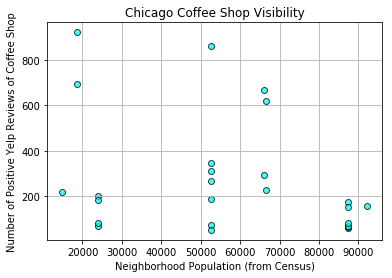

In [48]:
plt.scatter(by_population, yelp_reviews, marker = "o", edgecolors = "black", facecolor = "cyan", 
            alpha = 0.75, linewidth = 1.0)

plt.xlabel('Neighborhood Population (from Census)')
plt.ylabel('Number of Positive Yelp Reviews of Coffee Shop')
plt.title('Chicago Coffee Shop Visibility')
# plt.text(42, 30, 'Note: Circle size correlates population of Chicago Neighborhood (by Zip Code)')

plt.grid()
# plt.savefig("../CoffeeShopVisibility.png")
plt.show()

In [ ]:
\